In [1]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_pickle('/ghds/groups/labdesk/bshih/c19dash/c19_dashboard/c19_call.pickle')
df = df[df['sample_type'] == 'Sample'].reset_index().drop('level_0', axis=1)

df['row'] = df['pos_tube_rack'].str[14]
df['column'] = df['pos_tube_rack'].str.extract(r'.*?:[A-H](\d+)').astype('int')
df['RBP'] = df['pos_tube_rack'].str.extract(r'(.*?):.*$')

df['positive_detection'] = df['median_covid_ratio'].ge(0.01)
df['sample_count'] = 1

df.drop(df.query("RBP == 'RBP201022A059'|RBP == 'RBP201022A057'|RBP == 'RBP201022A176'|RBP == 'RBP201022A179'")\
        .query("column > 5").index, inplace=True)

mapping = {'A':0, 'B':0,
           'C':100, 'D':100,
           'E':50, 'F':50,
           'G':25, 'H':25
            }

# Median Covid Score

## All Nasal Samples

In [3]:
r = re.compile(r"(RBP201022A060|RBP201022A177|RBP201022A178|RBP201022A088|RBP201022A090|RBP201022A109|RBP201022A110|RBP201022A189|RBP201022A190)")

df_nasal = df[df['RBP'].str.match(r)==True]

In [4]:
df_nasal.RBP.unique()

array(['RBP201022A110', 'RBP201022A088', 'RBP201022A090', 'RBP201022A109',
       'RBP201022A190', 'RBP201022A189', 'RBP201022A178', 'RBP201022A177',
       'RBP201022A060'], dtype=object)

/home/bshih/miniconda3/envs/c19dash/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/bshih/miniconda3/envs/c19dash/lib/python3.6/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/bshih/miniconda3/envs/c19dash/lib/python3.6/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


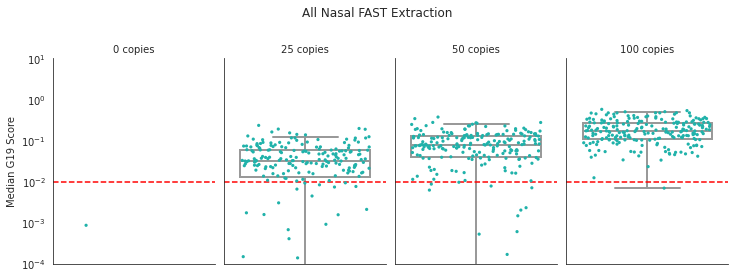

In [5]:
df_nasal['condition'] = df_nasal['row'].map(mapping)

sns.set_style('white')

g = sns.FacetGrid(df_nasal, col='condition')
g.map(sns.boxplot, 'condition', 'median_covid_ratio', \
      showfliers=False, color='w', linewidth=2)
g.map(sns.stripplot, 'condition', 'median_covid_ratio', jitter=0.4, size=3.2, color='lightseagreen')\
    .set(xticks=[], yscale='log', ylim=[0.0001, 10])

g.map(plt.axhline, y=0.01, ls='--', c='red')
g.set_titles(col_template="{col_name} copies")
g.set_axis_labels("", "Median G19 Score")

g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('All Nasal FAST Extraction')

g.fig.set_figheight(4)
g.fig.set_figwidth(10)

g.savefig('allnasalfast', dpi=300)


In [6]:
df_nasal_calls = pd.get_dummies(df_nasal.call)
df_nasal_passqc = pd.get_dummies(df_nasal.flags)
df_nasal = pd.concat([df_nasal, df_nasal_calls, df_nasal_passqc], axis=1)

df_nasal.groupby('condition').agg({'detected':'sum',
                               'not_detected':'sum',
                               'pass':'sum',
                               'sample_count':'sum',
                               'median_covid_ratio':'mean',
                               'positive_detection':'mean'
                              }).rename(columns={'median_covid_ratio':'mean_g19score'})

,detected,not_detected,pass,sample_count,mean_g19score,positive_detection
condition,,,,,,
0,0,197,197,198,0.000004,0.000000
25,168,48,216,216,0.041602,0.777778
50,196,20,216,216,0.090489,0.907407
100,215,1,216,216,0.199316,0.995370


## All Saliva Samples

In [7]:
r = re.compile(r"(RBP201022A057|RBP201022A176|RBP201022A086|RBP201112A131|RBP201022A108|RBP201022A185|RBP201022A188|RBP201022A241)")

df_spittoon = df[df['RBP'].str.match(r)==True]

In [8]:
df_spittoon.RBP.unique()

array(['RBP201022A188', 'RBP201022A108', 'RBP201112A131', 'RBP201022A086',
       'RBP201022A185', 'RBP201022A241', 'RBP201022A176', 'RBP201022A057'],
      dtype=object)

/home/bshih/miniconda3/envs/c19dash/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/bshih/miniconda3/envs/c19dash/lib/python3.6/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/bshih/miniconda3/envs/c19dash/lib/python3.6/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


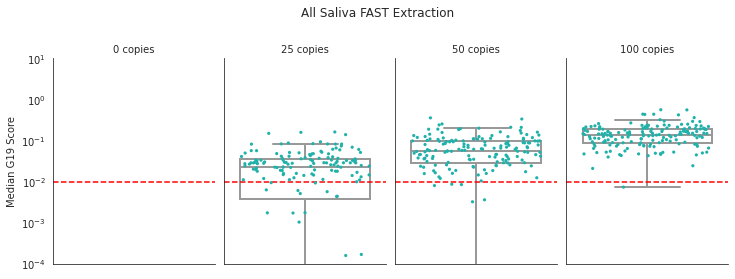

In [9]:
df_spittoon['condition'] = df_spittoon['row'].map(mapping)

sns.set_style('white')

g = sns.FacetGrid(df_spittoon, col='condition')

g.map(sns.boxplot, 'condition', 'median_covid_ratio', \
      showfliers=False, color='w', linewidth=2)
g.map(sns.stripplot, 'condition', 'median_covid_ratio', jitter=0.4, size=3.2, color='lightseagreen')\
    .set(xticks=[], yscale='log', ylim=[0.0001, 10])

g.map(plt.axhline, y=0.01, ls='--', c='red')
g.set_titles(col_template="{col_name} copies")
g.set_axis_labels("", "Median G19 Score")

g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('All Saliva FAST Extraction')

g.fig.set_figheight(4)
g.fig.set_figwidth(10)

g.savefig('allsalivafast', dpi=300)


In [10]:
df_spittoon_calls = pd.get_dummies(df_spittoon.call)
df_spittoon_passqc = pd.get_dummies(df_spittoon.flags)
df_spittoon = pd.concat([df_spittoon, df_spittoon_calls, df_spittoon_passqc], axis=1)

df_spittoon.groupby('condition').agg({'detected':'sum',
                               'not_detected':'sum',
                               'pass':'sum',
                               'sample_count':'sum',
                               'median_covid_ratio':'mean',
                               'positive_detection':'mean'
                              }).rename(columns={'median_covid_ratio':'mean_g19score'})

,detected,not_detected,pass,sample_count,mean_g19score,positive_detection
condition,,,,,,
0,0,148,148,148,0.000000,0.000000
25,114,49,163,164,0.027821,0.695122
50,150,14,164,164,0.072029,0.914634
100,163,1,164,164,0.152058,0.993902


# Split Saliva 200uL and 440uL

In [11]:
r_200 = re.compile(r"(RBP201022A086|RBP201112A131|RBP201022A108|RBP201022A185|RBP201022A188|RBP201022A241)")
r_440 = re.compile(r"(RBP201022A057|RBP201022A176)")
df_spittoon_200 = df[df['RBP'].str.match(r_200)==True]
df_spittoon_440 = df[df['RBP'].str.match(r_440)==True]

/home/bshih/miniconda3/envs/c19dash/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/bshih/miniconda3/envs/c19dash/lib/python3.6/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/bshih/miniconda3/envs/c19dash/lib/python3.6/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


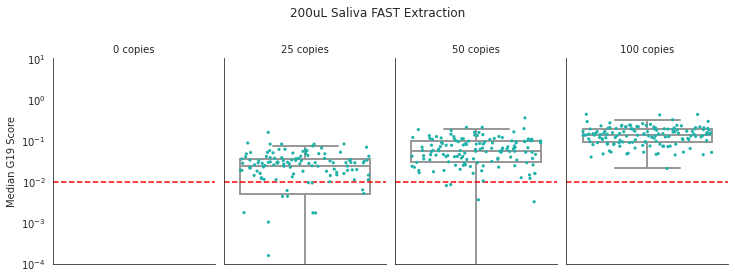

In [12]:
df_spittoon_200['condition'] = df_spittoon_200['row'].map(mapping)

sns.set_style('white')

g = sns.FacetGrid(df_spittoon_200, col='condition')

g.map(sns.boxplot, 'condition', 'median_covid_ratio', \
      showfliers=False, color='w', linewidth=2)
g.map(sns.stripplot, 'condition', 'median_covid_ratio', jitter=0.4, size=3.2, color='lightseagreen')\
    .set(xticks=[], yscale='log', ylim=[0.0001, 10])

g.map(plt.axhline, y=0.01, ls='--', c='red')
g.set_titles(col_template="{col_name} copies")
g.set_axis_labels("", "Median G19 Score")

g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('200uL Saliva FAST Extraction')

g.fig.set_figheight(4)
g.fig.set_figwidth(10)

g.savefig('200salivafast', dpi=300)


In [13]:
df_spittoon_200_calls = pd.get_dummies(df_spittoon_200.call)
df_spittoon_200_passqc = pd.get_dummies(df_spittoon_200.flags)
df_spittoon_200 = pd.concat([df_spittoon_200, df_spittoon_200_calls, df_spittoon_200_passqc], axis=1)

df_spittoon_200.groupby('condition').agg({'detected':'sum',
                               'not_detected':'sum',
                               'pass':'sum',
                               'sample_count':'sum',
                               'median_covid_ratio':'mean',
                               'positive_detection':'mean'
                              }).rename(columns={'median_covid_ratio':'mean_g19score'})

,detected,not_detected,pass,sample_count,mean_g19score,positive_detection
condition,,,,,,
0,0,132,132,132,0.000000,0.000000
25,102,42,144,144,0.025571,0.708333
50,135,9,144,144,0.068321,0.937500
100,144,0,144,144,0.147965,1.000000


/home/bshih/miniconda3/envs/c19dash/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/bshih/miniconda3/envs/c19dash/lib/python3.6/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/bshih/miniconda3/envs/c19dash/lib/python3.6/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


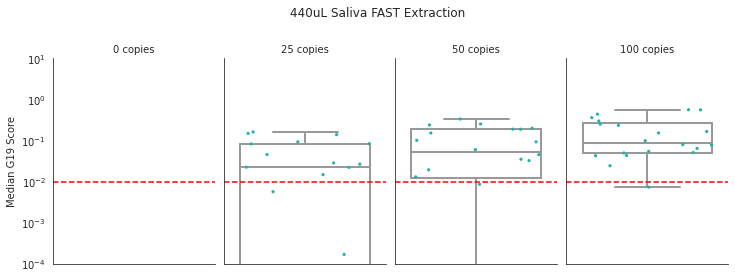

In [14]:
df_spittoon_440['condition'] = df_spittoon_440['row'].map(mapping)

sns.set_style('white')

g = sns.FacetGrid(df_spittoon_440, col='condition')

g.map(sns.boxplot, 'condition', 'median_covid_ratio', \
      showfliers=False, color='w', linewidth=2)
g.map(sns.stripplot, 'condition', 'median_covid_ratio', jitter=0.4, size=3.2, color='lightseagreen')\
    .set(xticks=[], yscale='log', ylim=[0.0001, 10])

g.map(plt.axhline, y=0.01, ls='--', c='red')
g.set_titles(col_template="{col_name} copies")
g.set_axis_labels("", "Median G19 Score")

g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('440uL Saliva FAST Extraction')

g.fig.set_figheight(4)
g.fig.set_figwidth(10)

g.savefig('440salivafast', dpi=300)


In [15]:
df_spittoon_440_calls = pd.get_dummies(df_spittoon_440.call)
df_spittoon_440_passqc = pd.get_dummies(df_spittoon_440.flags)
df_spittoon_440 = pd.concat([df_spittoon_440, df_spittoon_440_calls, df_spittoon_440_passqc], axis=1)

df_spittoon_440.groupby('condition').agg({'detected':'sum',
                               'not_detected':'sum',
                               'pass':'sum',
                               'sample_count':'sum',
                               'median_covid_ratio':'mean',
                               'positive_detection':'mean'
                              }).rename(columns={'median_covid_ratio':'mean_g19score'})

,detected,not_detected,pass,sample_count,mean_g19score,positive_detection
condition,,,,,,
0,0,16,16,16,0.000000,0.00
25,12,7,19,20,0.044024,0.60
50,15,5,20,20,0.098723,0.75
100,19,1,20,20,0.181533,0.95


## RNAse Data Wrangle

In [16]:
df = pd.read_pickle('/ghds/groups/labdesk/bshih/c19dash/c19_dashboard/c19_read_counts.pickle')
df = df[df['sample_type'] == 'Sample'].reset_index().drop('level_0', axis=1)

df['row'] = df['pos_tube_rack'].str.extract(r'.*?:([A-H]).*')
df['column'] = df['pos_tube_rack'].str.extract(r'.*?:[A-H](\d+)').astype('int')
df['RBP'] = df['pos_tube_rack'].str.extract(r'(.*?):.*$')

df.drop(df.query("RBP == 'RBP201022A059'|RBP == 'RBP201022A057'|RBP == 'RBP201022A176'|RBP == 'RBP201022A179'")\
        .query("column > 5").index, inplace=True)

mapping = {'A':0, 'B':0,
           'C':100, 'D':100,
           'E':50, 'F':50,
           'G':25, 'H':25
            }

## All Nasal Samples

In [17]:
r = re.compile(r"(RBP201022A060|RBP201022A177|RBP201022A178|RBP201022A088|RBP201022A090|RBP201022A109|RBP201022A110|RBP201022A189|RBP201022A190)")

df_nasal = df[df['RBP'].str.match(r)==True]
df_nasal['condition'] = df_nasal['row'].map(mapping)
df_nasal = df_nasal.groupby('run_sample_id').median()


/home/bshih/miniconda3/envs/c19dash/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


/home/bshih/miniconda3/envs/c19dash/lib/python3.6/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/bshih/miniconda3/envs/c19dash/lib/python3.6/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


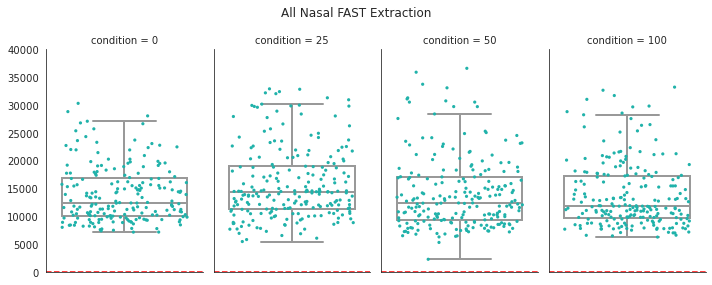

In [18]:
sns.set_style('white')

g = sns.FacetGrid(df_nasal, col='condition')
g.map(sns.boxplot, 'condition', 'rnase_count', \
      showfliers=False, color='w', linewidth=2)
g.map(sns.stripplot, 'condition', 'rnase_count', jitter=0.4, size=3.2, color='lightseagreen')\
    .set(xticks=[])

g.set_titles(col_template="{col_name} copies")
g.set_axis_labels("", "Median RNAse Count")

g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('All Nasal FAST Extraction')

g.fig.set_figheight(4)
g.fig.set_figwidth(10)
g.set(ylim=(0,40000))
g.map(plt.axhline, y=50, ls='--', c='red')

g.savefig('RNASEallnasalfast', dpi=300)


## All Saliva Samples

In [19]:
r = re.compile(r"(RBP201022A057|RBP201022A176|RBP201022A086|RBP201112A131|RBP201022A108|RBP201022A185|RBP201022A188|RBP201022A241)")

df_spittoon = df[df['RBP'].str.match(r)==True]
df_spittoon['condition'] = df_spittoon['row'].map(mapping)
df_spittoon = df_spittoon.groupby('run_sample_id').median()


/home/bshih/miniconda3/envs/c19dash/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


/home/bshih/miniconda3/envs/c19dash/lib/python3.6/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/bshih/miniconda3/envs/c19dash/lib/python3.6/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


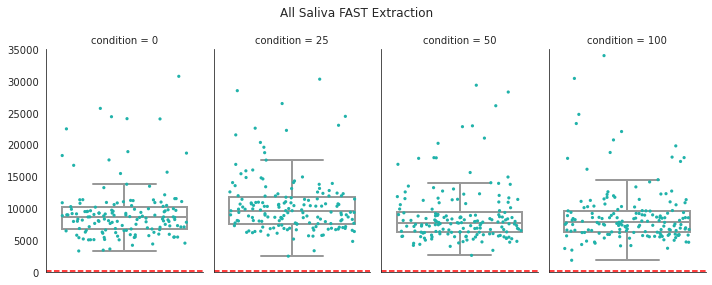

In [20]:
sns.set_style('white')

g = sns.FacetGrid(df_spittoon, col='condition')
g.map(sns.boxplot, 'condition', 'rnase_count', \
      showfliers=False, color='w', linewidth=2)
g.map(sns.stripplot, 'condition', 'rnase_count', jitter=0.4, size=3.2, color='lightseagreen')\
    .set(xticks=[])

g.set_titles(col_template="{col_name} copies")
g.set_axis_labels("", "Median RNAse Count")

g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('All Saliva FAST Extraction')

g.fig.set_figheight(4)
g.fig.set_figwidth(10)
g.set(ylim=(0,35000))
g.map(plt.axhline, y=50, ls='--', c='red')

g.savefig('RNASEallsalivafast', dpi=300)


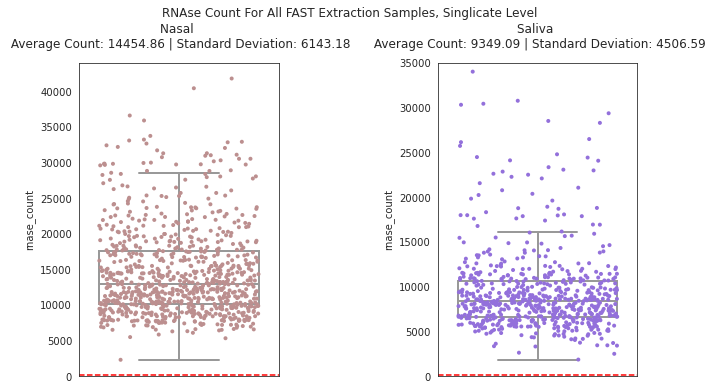

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
fig.suptitle('RNAse Count For All FAST Extraction Samples, Singlicate Level', y=0.98)

a = sns.boxplot(y=df_nasal['rnase_count'], showfliers=False, color='w', linewidth=2, ax=ax1)
b = sns.stripplot(y=df_nasal['rnase_count'], jitter=0.4, size=4, color='rosybrown', ax=ax1)
a.set_ylim((0, 44000))
ax1.axhline(50, ls='--', color='r')


c = sns.boxplot(y=df_spittoon['rnase_count'], showfliers=False, color='w', linewidth=2, ax=ax2)
d = sns.stripplot(y=df_spittoon['rnase_count'], jitter=0.4, size=4, color='mediumpurple', ax=ax2)
c.set_ylim((0, 35000))
ax2.axhline(50, ls='--', color='r')

ax1.set_title(f'Nasal \n Average Count: {df_nasal.rnase_count.mean():.2f} | Standard Deviation: {df_nasal.rnase_count.std():.2f}', pad=15)
ax2.set_title(f'Saliva \n Average Count: {df_spittoon.rnase_count.mean():.2f} | Standard Deviation: {df_spittoon.rnase_count.std():.2f}', pad=15)

plt.subplots_adjust(wspace=0.8,
                    top=0.85)

fig.savefig('RNAse Count', dpi=300)
plt.show()